In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/sales-of-shampoo-over-a-three-ye.csv',sep=";",index_col=[0],parse_dates=[0])

In [3]:
df.head()

,Sales
Month,
01-01,266.0
01-02,145.9
01-03,183.1
01-04,119.3
01-05,180.3


In [4]:
len(df)

36

<AxesSubplot:xlabel='Month', ylabel='Sales'>

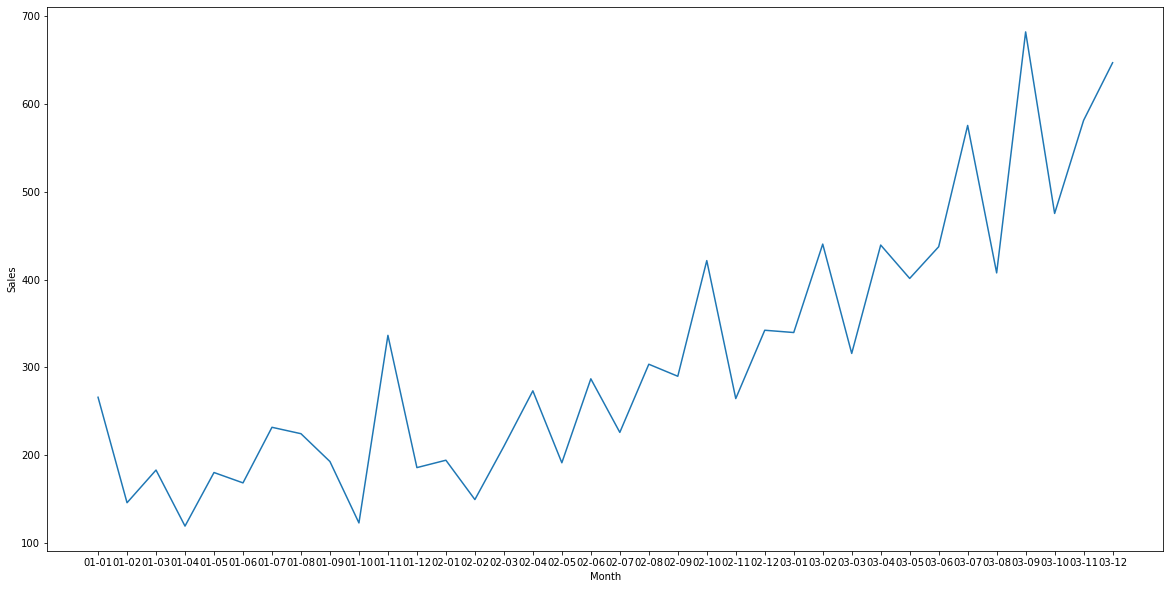

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
sns.lineplot(x='Month',y='Sales',data=df)

In [6]:
moving_average=df.rolling(window=20).mean()

In [7]:
moving_average

,Sales
Month,
01-01,NaN
01-02,NaN
01-03,NaN
01-04,NaN
01-05,NaN
01-06,NaN
01-07,NaN
01-08,NaN
01-09,NaN


C:\Users\akshay goel\.conda\envs\tf\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Month'>

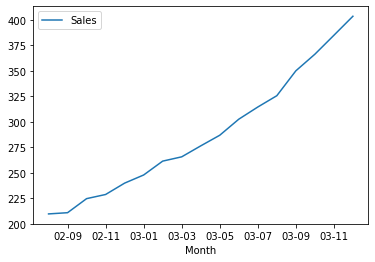

In [8]:
moving_average.plot()

In [9]:
import statsmodels.api as sm
sm.stats.durbin_watson(df)

array([0.09548538])

In [10]:
df.dtypes

Sales    float64
dtype: object

C:\Users\akshay goel\.conda\envs\tf\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


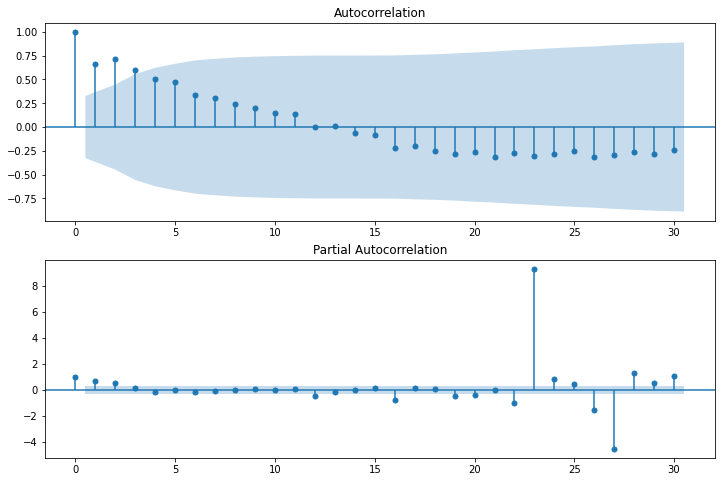

In [11]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,1,1)
fig = sm.graphics.tsa.plot_acf(df['Sales'].values, lags=30, ax=ax1)
ax2 = fig.add_subplot(2,1,2)
fig = sm.graphics.tsa.plot_pacf(df['Sales'], lags=30, ax=ax2)

<AxesSubplot:xlabel='Month', ylabel='Sales'>

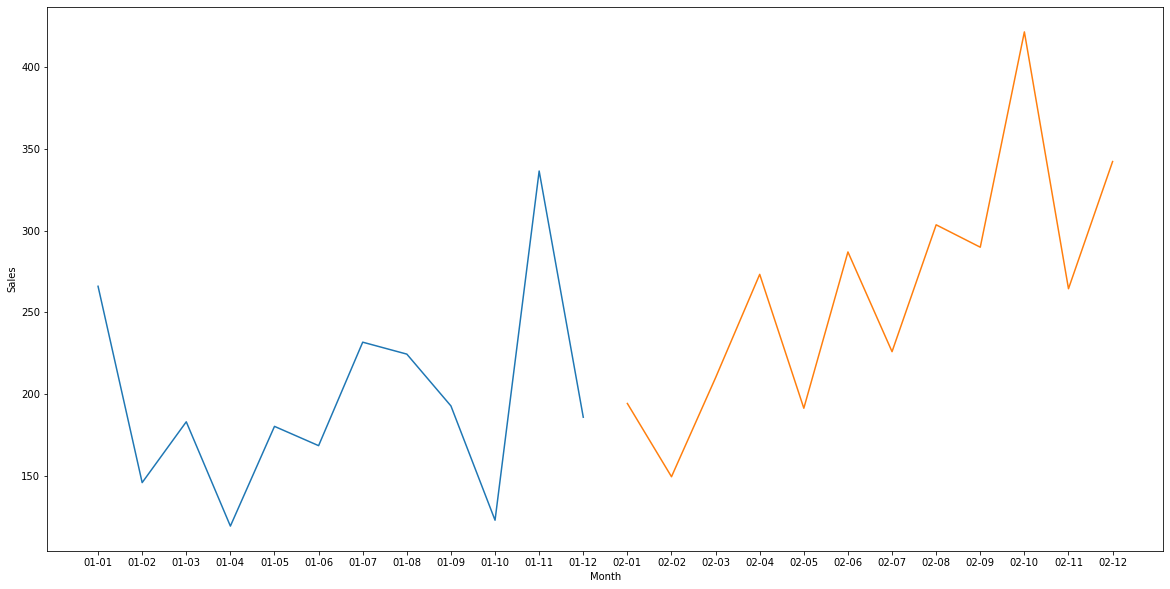

In [12]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Month", y="Sales",legend = 'full' , data=df[:12])
sns.lineplot(x="Month", y="Sales",legend = 'full' , data=df[12:24])

C:\Users\akshay goel\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


<Figure size 432x288 with 0 Axes>

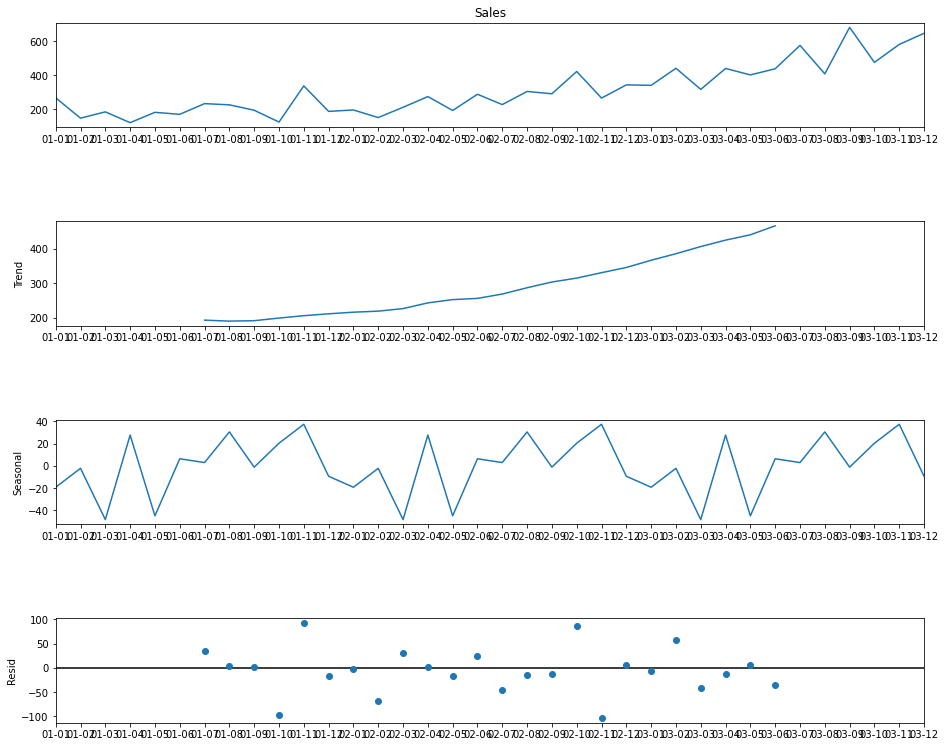

In [13]:
result = sm.tsa.seasonal_decompose(df['Sales'], model='additive', freq=12)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [34]:
first_diff = df.Sales - df.Sales.shift(1)

In [35]:
first_diff

Month
01-01      NaN
01-02   -120.1
01-03     37.2
01-04    -63.8
01-05     61.0
01-06    -11.8
01-07     63.3
01-08     -7.3
01-09    -31.7
01-10    -69.9
01-11    213.6
01-12   -150.6
02-01      8.4
02-02    -44.8
02-03     60.6
02-04     63.2
02-05    -81.9
02-06     95.6
02-07    -61.0
02-08     77.6
02-09    -13.7
02-10    131.7
02-11   -157.1
02-12     77.8
03-01     -2.6
03-02    100.7
03-03   -124.5
03-04    123.4
03-05    -38.0
03-06     36.1
03-07    138.1
03-08   -167.9
03-09    274.4
03-10   -206.7
03-11    106.0
03-12     65.6
Name: Sales, dtype: float64

C:\Users\akshay goel\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


<Figure size 432x288 with 0 Axes>

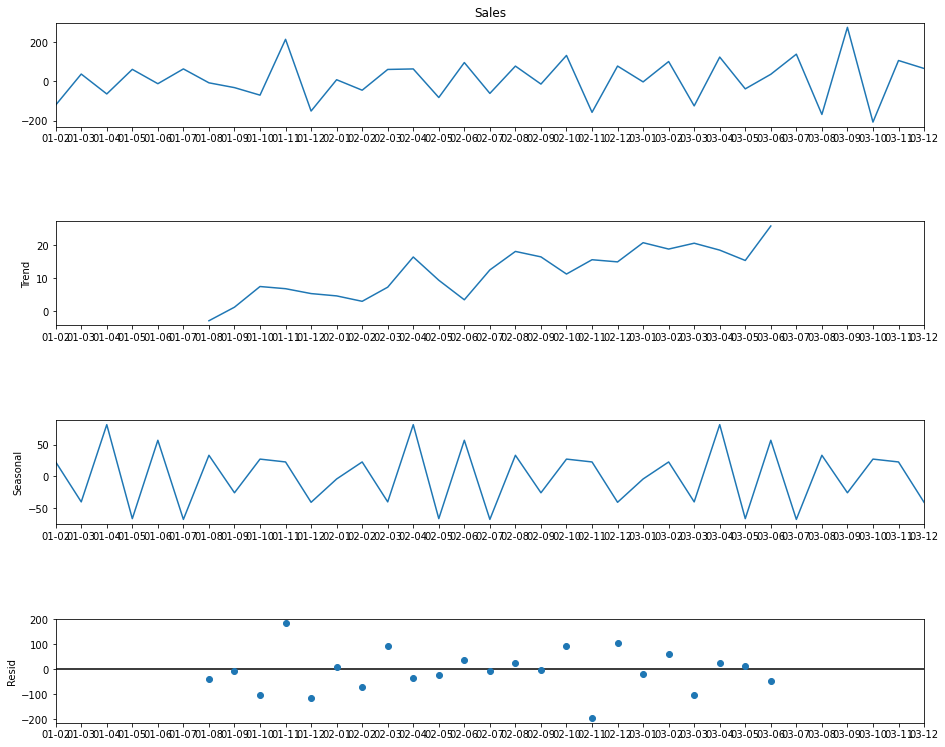

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(first_diff.dropna(inplace=False), model='additive', freq=12)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [37]:
dftest = sm.tsa.stattools.adfuller(first_diff.dropna(inplace=False), autolag='AIC', maxlag = 10 )
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)
print(dftest[1])

Test Statistic                -7.249074e+00
p-value                        1.799857e-10
#Lags Used                     1.000000e+00
Number of Observations Used    3.300000e+01
Critical Value (1%)           -3.646135e+00
Critical Value (5%)           -2.954127e+00
Critical Value (10%)          -2.615968e+00
dtype: float64
1.7998574141687034e-10


C:\Users\akshay goel\.conda\envs\tf\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\akshay goel\.conda\envs\tf\lib\site-packages\statsmodels\regression\linear_model.py:1398: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (x[0:-k] * x[k:]).sum() / (n - k * adj_needed)


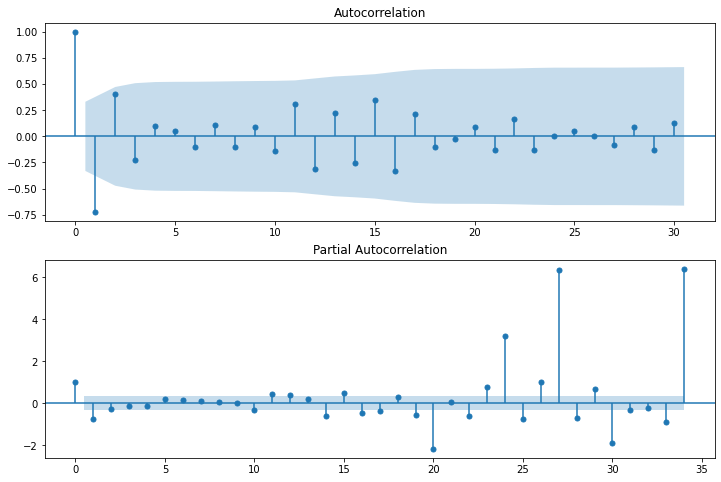

In [38]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff.dropna(inplace=False).values, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff.dropna(inplace=False), lags=35, ax=ax2)

In [40]:
arima_mod = sm.tsa.ARIMA(df['Sales'], (10,1,0)).fit(disp=False)
print(arima_mod.summary())

C:\Users\akshay goel\.conda\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\akshay goel\.conda\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                ARIMA(10, 1, 0)   Log Likelihood                -192.107
Method:                       css-mle   S.D. of innovations             54.806
Date:                Sat, 14 Aug 2021   AIC                            408.213
Time:                        11:39:26   BIC                            426.878
Sample:                             1   HQIC                           414.656
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.5943      3.194      3.631      0.000       5.335      17.854
ar.L1.D.Sales     -1.2611      0.164     -7.707      0.000      -1.582      -0.940
ar.L2.D.Sales     -0.7789      0.250

C:\Users\akshay goel\.conda\envs\tf\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Month'>

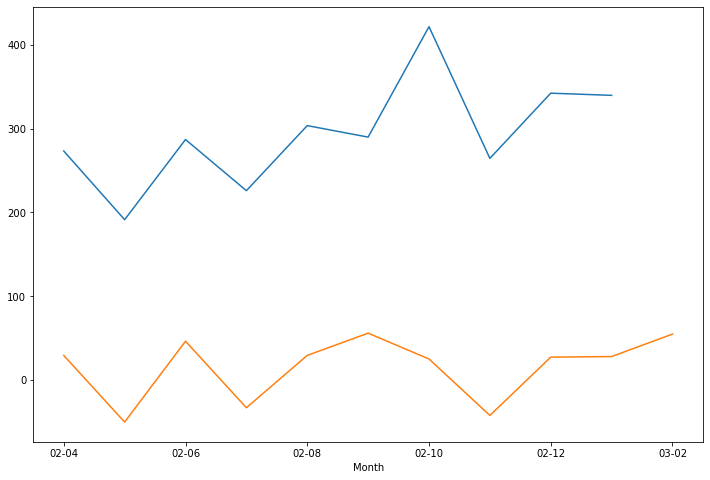

In [41]:
start_index = 15
end_index = 25
p = arima_mod.predict(start = start_index, end= end_index, dynamic= True)  
df[start_index:end_index]['Sales'].plot(figsize=(12, 8))
p.plot(figsize=(12,8))

In [42]:
from scipy.stats import stats
resid = arima_mod.resid
stats.normaltest(resid)

NormaltestResult(statistic=0.29582778738387777, pvalue=0.8625053788985618)

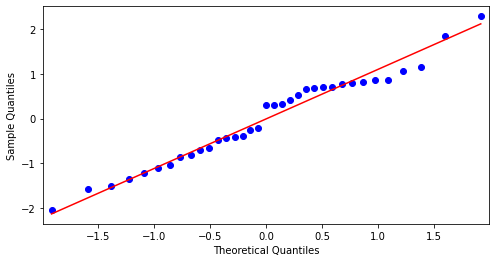

In [43]:
from statsmodels.graphics.api import qqplot
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

In [46]:
sarima_mod6 = sm.tsa.statespace.SARIMAX(df.Sales, trend='n', order=(10,1,0),seasonal_order=(20,1,0,12)).fit()
print(sarima_mod6.summary())

C:\Users\akshay goel\.conda\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\akshay goel\.conda\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\akshay goel\.conda\envs\tf\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\akshay goel\.conda\envs\tf\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_descri

                                      SARIMAX Results                                       
Dep. Variable:                                Sales   No. Observations:                   36
Model:             SARIMAX(10, 1, 0)x(20, 1, 0, 12)   Log Likelihood                -126.672
Date:                              Sat, 14 Aug 2021   AIC                            315.344
Time:                                      11:55:16   BIC                            350.545
Sample:                                           0   HQIC                           324.197
                                               - 36                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.1445     60.110     -0.036      0.972    -119.958     115.669
ar.L2         -2.77

C:\Users\akshay goel\.conda\envs\tf\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Month'>

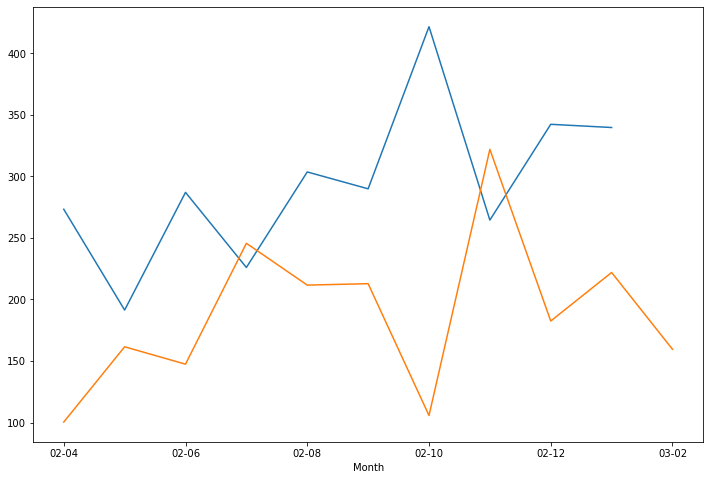

In [47]:
start_index = 15
end_index = 25
p = sarima_mod6.predict(start = start_index, end= end_index, dynamic= True)  
df[start_index:end_index]['Sales'].plot(figsize=(12, 8))
p.plot(figsize=(12,8))

In [52]:
arima_mod.save('timeassignment.pickle')

In [53]:
loaded=ARIMAResults.load('timeassignment.pickle')

In [51]:
from statsmodels.tsa.arima_model import ARIMAResults